In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/chipotle.tsv",sep="\t")

In [4]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


1. **Missing Values**:
Question: Check for missing values in each column (Order ID, Quantity, Item Name, Choice Description, Item Price). How should missing values be handled?


In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Above we see that only choice description column contains missing values

In [6]:
df["choice_description"] = df["choice_description"].fillna("No description Available")

In [7]:
df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

In [8]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,No description Available,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,No description Available,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


2. **Data Types**:
Question: Verify the data types of each column. Do they align with their expected types, and should any adjustments be made?


In [9]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


from above we observe that item_price is of object datatype and it should be of integer datatype

3. **Duplicated Entries:**
Question: Identify and handle duplicated entries in the dataset. How might duplicates impact analysis, and what is the appropriate action?


In [14]:
df.duplicated().value_counts()

False    4563
True       59
dtype: int64

there are 59 duplicate rows

In [17]:
df.duplicated().sum()

59

In [19]:
duplicates=df[df.duplicated()]

In [24]:
duplicates

,order_id,quantity,item_name,choice_description,item_price
238,103,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$11.75
248,108,1,Canned Soda,[Mountain Dew],$1.09
297,129,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, G...",$11.75
381,165,1,Canned Soft Drink,[Coke],$1.25
484,205,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
567,233,1,Canned Soft Drink,[Diet Coke],$1.25
617,254,1,Chips,No description Available,$2.15
684,282,1,Canned Soft Drink,[Coke],$1.25
773,319,1,Chicken Bowl,"[Tomatillo-Green Chili Salsa (Medium), Black B...",$8.49
908,376,1,Steak Burrito,"[Roasted Chili Corn Salsa (Medium), [Rice, Faj...",$8.99


The appropriate action would be to drop those duplicate rows. as it does not make sense to keep duplicate rows

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(4563, 5)

In [28]:
df.duplicated().sum()

0

4. **Quantity and Item Price**:
Question: Examine the Quantity and Item Price columns. Are there any inconsistencies or anomalies that need correction?

---




In [32]:
print("Quantity")
print(df["quantity"].value_counts())
df["quantity"].unique()

Quantity
1     4296
2      224
3       28
4       10
5        1
15       1
7        1
8        1
10       1
Name: quantity, dtype: int64


array([ 1,  2,  3,  4,  5, 15,  7,  8, 10])

In [34]:
print("Item Price")
print(df["item_price"].value_counts())
df["item_price"].unique()

Item Price
$8.75      719
$11.25     516
$9.25      395
$4.45      344
$8.49      308
          ... 
$13.35       1
$7.50        1
$4.36        1
$32.94       1
$11.49       1
Name: item_price, Length: 78, dtype: int64


array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

removing the $ sign from the item_price cols makes it more appropriate

5. **Choice Description**:
Question: Analyze the Choice Description column. How should choices be handled, especially when there are multiple descriptions for a single item?


In [36]:
df["choice_description"].unique()

array(['No description Available', '[Clementine]', '[Apple]', ...,
       '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]',
       '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]',
       '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]'],
      dtype=object)

In [37]:
df["choice_description"].value_counts()

No description Available                                                                                                                         1228
[Diet Coke]                                                                                                                                       133
[Coke]                                                                                                                                            115
[Sprite]                                                                                                                                           77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                             41
                                                                                                                                                 ... 
[Tomatillo Green Chili Salsa, [Sour Cream, Cheese, Guacamole, Rice, Fajita Vegetables]]             

There are multiple description for single item so what we can do is split the data using separator as comma and creating additional columns to store multiple descriptions.

6. **Handling Special Characters**:
Question: Check for special characters in text-based columns (e.g., Item Name, Choice Description). How can these be addressed for consistency?


special character in item_name column is - (hyphen) and in Choice description column is [ ] and comma so removing these special character from data leads to consistency

In [39]:
df['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [40]:
df["item_name"] = df["item_name"].replace("-"," ",regex=True)

In [41]:
df["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl',
       'Steak Bowl', 'Barbacoa Soft Tacos', 'Veggie Burrito',
       'Veggie Bowl', 'Steak Crispy Tacos',
       'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos',
       'Veggie Salad Bowl', 'Chips and Roasted Chili Corn Salsa',
       'Carnitas Soft Tacos', 'Chicken Salad', 'Canned Soft Drink',
       'Steak Salad Bowl', '6 Pack Soft Drink', 'Bowl', 'Burrito',
       'Crispy Tacos', 'Carnitas Crispy Tacos', 'Steak Salad',
       'Chips and Mild Fresh Tomato Salsa', 'Veggie Soft Tacos',
       'Carnitas Salad Bowl', 'Barbacoa Salad Bow

In [42]:
df["choice_description"].unique()

array(['No description Available', '[Clementine]', '[Apple]', ...,
       '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]',
       '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]',
       '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]'],
      dtype=object)

In [43]:
df["choice_description"]=df["choice_description"].str.strip("[]")

In [45]:
df["choice_description"].unique()

array(['No description Available', 'Clementine', 'Apple', ...,
       'Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole',
       'Tomatillo Green Chili Salsa, [Rice, Black Beans',
       'Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole'],
      dtype=object)

In [46]:
df["choice_description"]=df["choice_description"].str.replace("[","").str.replace("]","")

<ipython-input-46-87543edc9ee9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["choice_description"]=df["choice_description"].str.replace("[","").str.replace("]","")


In [47]:
df["choice_description"].unique()

array(['No description Available', 'Clementine', 'Apple', ...,
       'Roasted Chili Corn Salsa, Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole',
       'Tomatillo Green Chili Salsa, Rice, Black Beans',
       'Tomatillo Green Chili Salsa, Rice, Fajita Vegetables, Black Beans, Guacamole'],
      dtype=object)

In [50]:
df["item_price"]=df["item_price"].str.replace("$","")

<ipython-input-50-da8256b9c9e9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["item_price"]=df["item_price"].str.replace("$","")


In [51]:
df["item_price"].unique()

array(['2.39 ', '3.39 ', '16.98 ', '10.98 ', '1.69 ', '11.75 ', '9.25 ',
       '4.45 ', '8.75 ', '11.25 ', '8.49 ', '2.18 ', '8.99 ', '1.09 ',
       '2.95 ', '2.15 ', '3.99 ', '22.50 ', '11.48 ', '17.98 ', '17.50 ',
       '4.30 ', '5.90 ', '1.25 ', '23.78 ', '6.49 ', '11.08 ', '1.50 ',
       '22.16 ', '32.94 ', '22.20 ', '10.58 ', '2.50 ', '23.50 ', '7.40 ',
       '18.50 ', '3.00 ', '6.78 ', '11.89 ', '9.39 ', '4.00 ', '3.75 ',
       '8.69 ', '2.29 ', '8.90 ', '3.27 ', '3.89 ', '8.19 ', '35.00 ',
       '27.75 ', '11.80 ', '6.00 ', '26.25 ', '21.96 ', '4.36 ', '7.50 ',
       '4.78 ', '13.35 ', '6.45 ', '5.07 ', '22.96 ', '7.17 ', '7.98 ',
       '4.50 ', '26.07 ', '12.98 ', '35.25 ', '44.25 ', '10.50 ',
       '33.75 ', '16.38 ', '13.52 ', '5.00 ', '15.00 ', '8.50 ', '17.80 ',
       '1.99 ', '11.49 '], dtype=object)

7. **Order Id Integrity**:
Question: Cross-reference the Order ID column for integrity. Are there any irregularities or patterns that need validation?


In [52]:
df['order_id'].isnull().any()

False

In [53]:
df['order_id'].duplicated().any()

True

In [57]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,No description Available,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo Green Chili Salsa,No description Available,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98


8. **Item Name Standardization:**
Question: Standardize the Item Name column. Are there variations that can be unified for better analysis?


In [61]:
df["item_name"]=df["item_name"].str.strip() #remove leading and trailing whitespaces from each string.

In [62]:
df["item_name"]

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4563, dtype: object

9. **Quantity and Price Relationships:**
Question: Investigate the relationships between Quantity and Item Price. Are there cases where adjustments need to be made for accurate analysis?


In [63]:
print(df[['quantity', 'item_price']].describe())

          quantity
count  4563.000000
mean      1.076704
std       0.412739
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


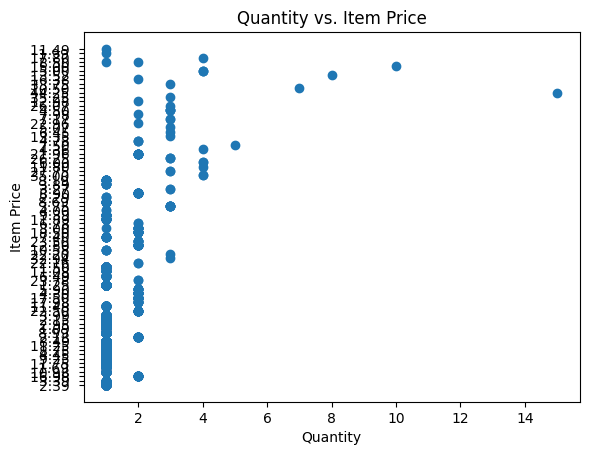

In [64]:
import matplotlib.pyplot as plt
plt.scatter(df['quantity'], df['item_price'])
plt.xlabel('Quantity')
plt.ylabel('Item Price')
plt.title('Quantity vs. Item Price')
plt.show()

10. **Data Integrity Check:**
Question: Perform a data integrity check by ensuring that quantities and prices align with the corresponding items and descriptions.


In [67]:
grouped_data = df.groupby(['item_name', 'choice_description']).agg({
    'quantity': 'sum',
    'item_price': lambda x: x.astype(float).mean()
}).reset_index()


In [71]:
grouped_data

,item_name,choice_description,quantity,item_price
0,6 Pack Soft Drink,Coke,21,6.490000
1,6 Pack Soft Drink,Diet Coke,25,6.760417
2,6 Pack Soft Drink,Lemonade,2,6.490000
3,6 Pack Soft Drink,Nestea,2,6.490000
4,6 Pack Soft Drink,Sprite,5,6.490000
...,...,...,...,...
1863,Veggie Soft Tacos,"Fresh Tomato Salsa, Black Beans, Cheese, Sour ...",1,8.750000
1864,Veggie Soft Tacos,"Fresh Tomato Salsa, Fajita Vegetables, Rice, B...",1,11.250000
1865,Veggie Soft Tacos,"Roasted Chili Corn Salsa (Medium), Black Beans...",1,8.490000
1866,Veggie Soft Tacos,"Roasted Chili Corn Salsa, Fajita Vegetables, B...",1,8.750000


In [72]:
df.to_csv("cleaned_chipotle.csv",sep=",")

12. **Handling Categorical Data:**
Question: For categorical columns (e.g., Item Name), consider encoding or transforming them into a format suitable for analysis.


In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['item_name_encoded'] = encoder.fit_transform(df['item_name'])

In [75]:
df["item_name_encoded"].unique()

array([24, 31, 32, 28, 17, 34, 36, 40, 25, 19, 22, 18,  9,  2, 12, 11,  6,
        1, 23, 21, 35,  5, 42, 41, 37, 29,  3, 45, 27, 16, 20, 10, 39,  0,
        7,  8, 30, 13, 38, 26, 46, 15,  4, 33, 43, 44, 14])

13. **Consistent Quantity and Price Units:**
Question: Ensure consistency in units for Quantity and Item Price. Should any conversions or adjustments be made for uniform analysis?


In [77]:
df['Quantity-Dozen'] = df['quantity'] * 12  # Convert dozens to individual items


In [79]:
df['Quantity-Dozen'].unique()

array([ 12,  24,  36,  48,  60, 180,  84,  96, 120])